<a href="https://colab.research.google.com/github/gundaminpde/2022/blob/main/save_load_train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.

targetUrl="https://raw.githubusercontent.com/gundaminpde/2022/main/sonar3.csv"


# 광물 데이터를 불러옵니다. 

df = pd.read_csv(targetUrl, header=None)

# 첫 5줄을 봅니다. 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [ ]:
# 마지막 5줄을 봅니다. 
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,1


In [ ]:
# 일반 암석(0)과 광석(1)이 몇 개 있는지 확인합니다.
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [5]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# 학습셋과 테스트셋을 구분합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)



In [7]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25)) #Dropout 사용
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
15/15 [==============================] - 1s 3ms/step - loss: 0.6833 - accuracy: 0.5310
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.5724
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.6000
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.6690
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.5862
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.6552
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.7241
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5886 - accuracy: 0.6828
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7310
Epoch 10/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5664 - accuracy: 0.7103


In [ ]:
# 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])



2/2 [==============================] - 0s 8ms/step - loss: 0.5890 - accuracy: 0.6667
Test accuracy: 0.6666666865348816


In [ ]:
# 모델 이름과 저장할 위치를 함께 지정합니다. 
model.save('./data/model/my_model.hdf5') 


from tensorflow.keras.models import  load_model

# 테스트를 위해 조금 전 사용한 모델을 메모리에서 삭제합니다.
del model 



In [ ]:
# 모델을 새로 불러옵니다.
model = load_model('./data/model/my_model.hdf5') 

# 불러온 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.5890 - accuracy: 0.6667
Test accuracy: 0.6666666865348816


In [ ]:
# 그래프 확인을 위한 긴 학습 
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.000815,1.0,1.110081,0.756757
1,0.000813,1.0,1.110163,0.756757
2,0.000811,1.0,1.110203,0.756757
3,0.000810,1.0,1.110587,0.756757
4,0.000808,1.0,1.111241,0.756757
...,...,...,...,...
1995,0.000066,1.0,1.616380,0.756757
1996,0.000066,1.0,1.616584,0.756757
1997,0.000066,1.0,1.616708,0.756757
1998,0.000066,1.0,1.616794,0.756757


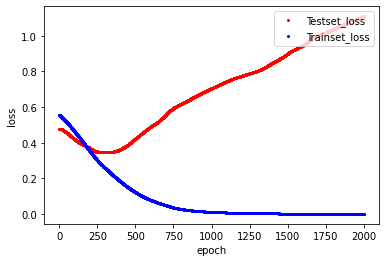

In [ ]:
# y_vloss에 검증셋의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']


# x 값을 지정하고 검증셋의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.

import matplotlib.pyplot as plt
import numpy as np

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:

### k겹 교차 검증

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.

targetUrl="https://raw.githubusercontent.com/gundaminpde/2022/main/sonar3.csv"


# 광물 데이터를 불러옵니다. 

df = pd.read_csv(targetUrl, header=None)


# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

# 몇 겹으로 나눌 것인지를 정합니다. 
k=5

# KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

# 정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn():
    model = Sequential() # 딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# K겹 교차 검증을 이용해 k번의 학습을 실행합니다. 
for train_index , test_index in kfold.split(X):  # for 문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0) 
    
    accuracy = model.evaluate(X_test, y_test)[1]  # 정확도를 구합니다.
    acc_score.append(accuracy)  # 정확도 리스트에 저장합니다.

# k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score)/k

# 결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)



2/2 [==============================] - 0s 9ms/step - loss: 0.6187 - accuracy: 0.6098
정확도: [0.761904776096344, 0.8333333134651184, 0.5952380895614624, 0.6829268336296082, 0.6097561120986938]
정확도 평균: 0.6966318249702453
